In [3]:
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/


import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

data = pd.read_csv('airline-passengers.csv')

print '\n Data Types:'
print data.dtypes


data.head()


 Data Types:
Month         object
Passengers     int64
dtype: object


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.index

RangeIndex(start=0, stop=144, step=1)

In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m') 

data = pd.read_csv('airline-passengers.csv', 
                   parse_dates=['Month'], 
                   index_col='Month',
                   date_parser=dateparse)


'''
parse_dates: the column which contains the date-time information. the column name is ‘Month’.
index_col: index has to be the variable depicting date-time information. 
So this argument tells pandas to use the ‘Month’ column as index.
date_parser: This specifies a function which converts an input string into datetime variable. 
default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. 
If the data is not in this format, the format has to be manually defined. 
Something similar to the dataparse function defined here can be used for this purpose.
'''

data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=144, freq=None)

In [7]:
ts = data['Passengers'] 
print type(ts)
ts.head(10)


<class 'pandas.core.series.Series'>


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: Passengers, dtype: int64

In [17]:
#1. Specific the index as a string constant:
ts['1949-01-01']

112

In [18]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1949,1,1)]


112

In [19]:
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [20]:
#2. Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [21]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64

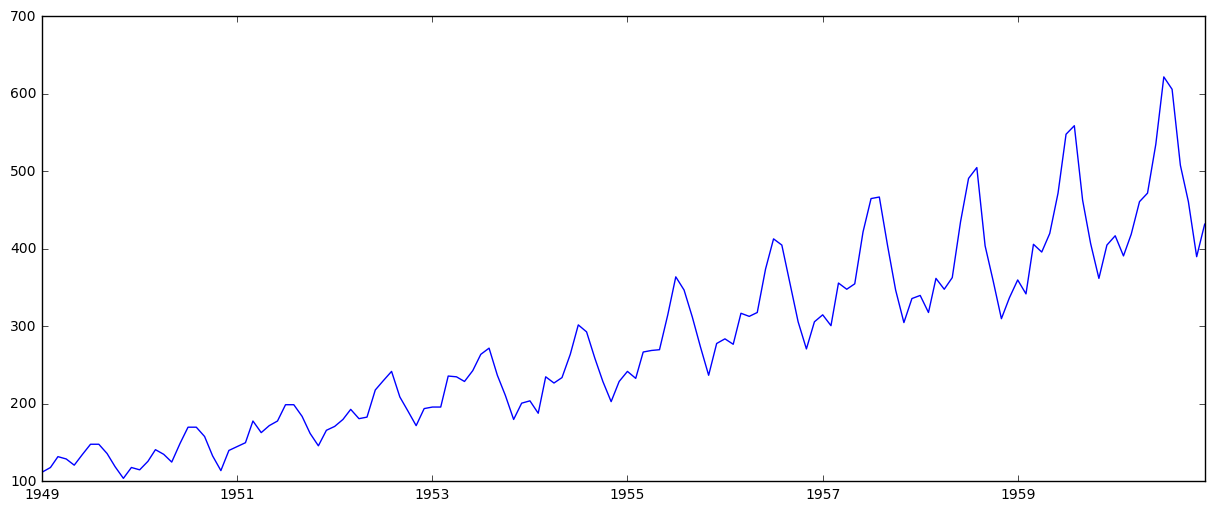

In [22]:
#stationary :https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/
plt.plot(ts)

/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


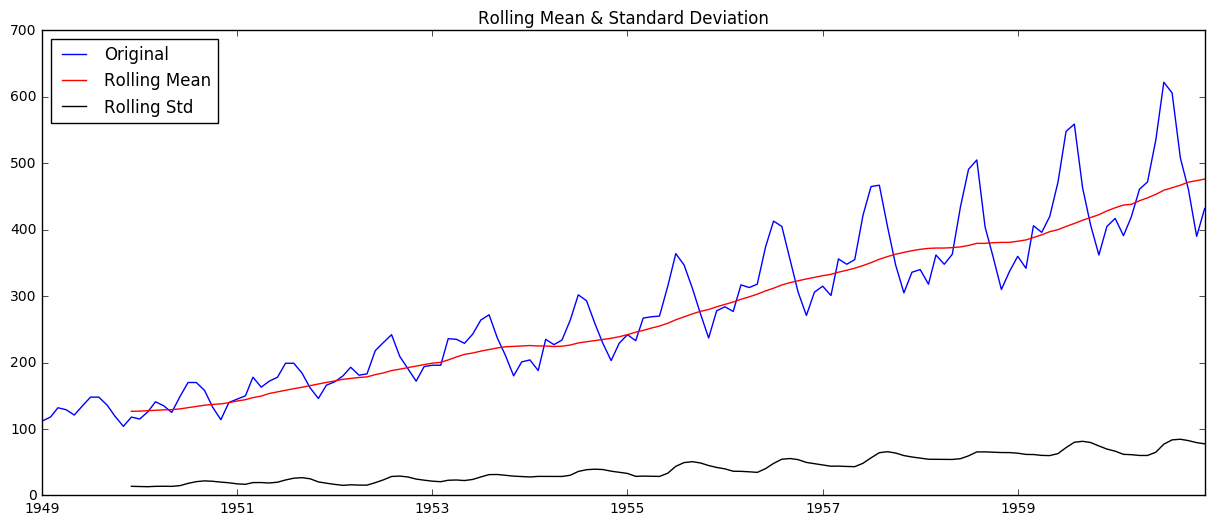

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [24]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value',
                                '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
    
test_stationarity(ts)

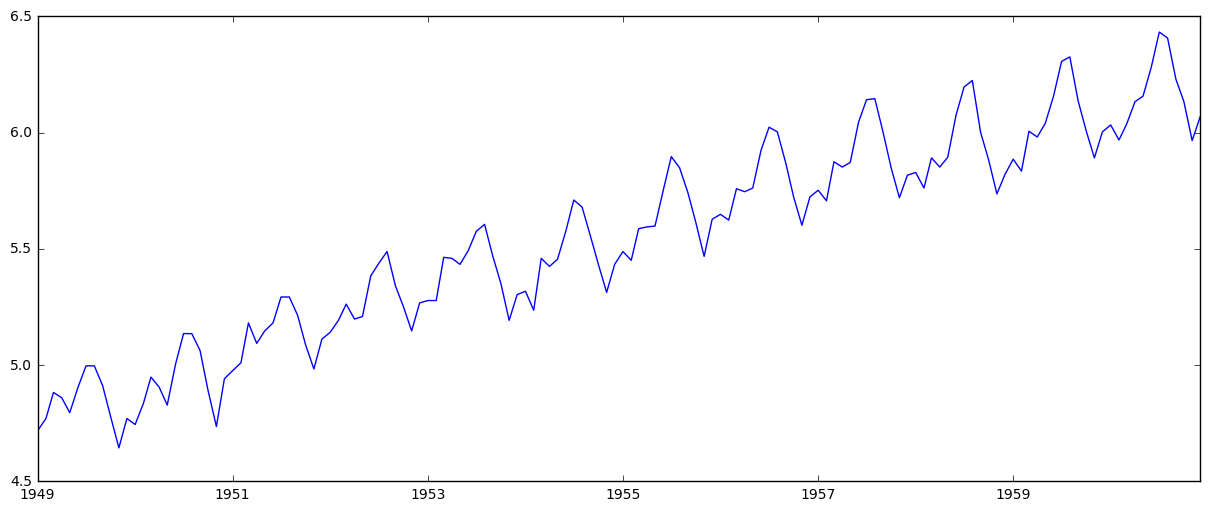

In [25]:
ts_log = np.log(ts)
plt.plot(ts_log)

/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


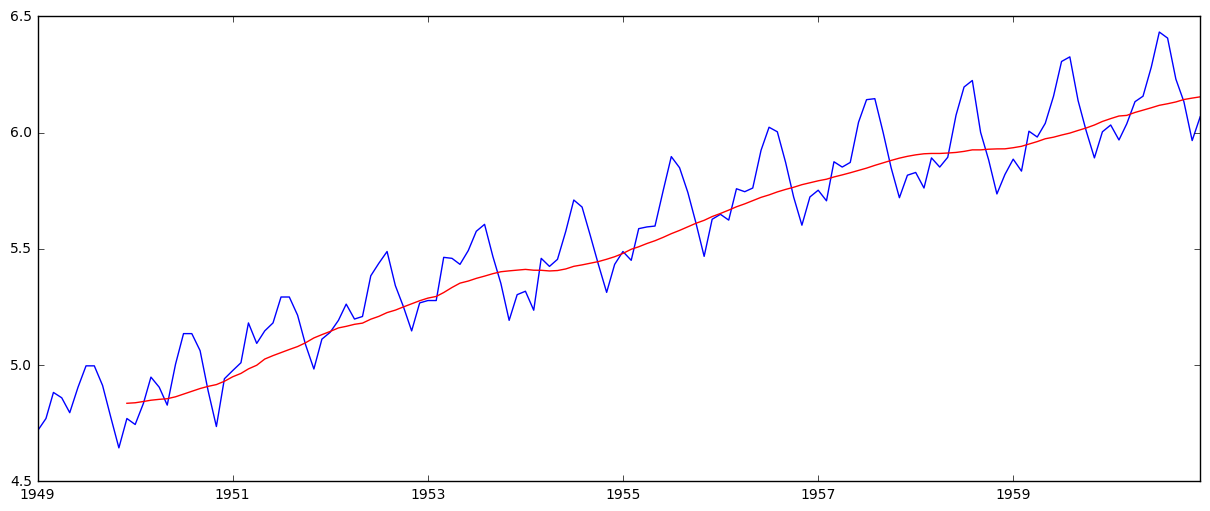

In [26]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [27]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: Passengers, dtype: float64

/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


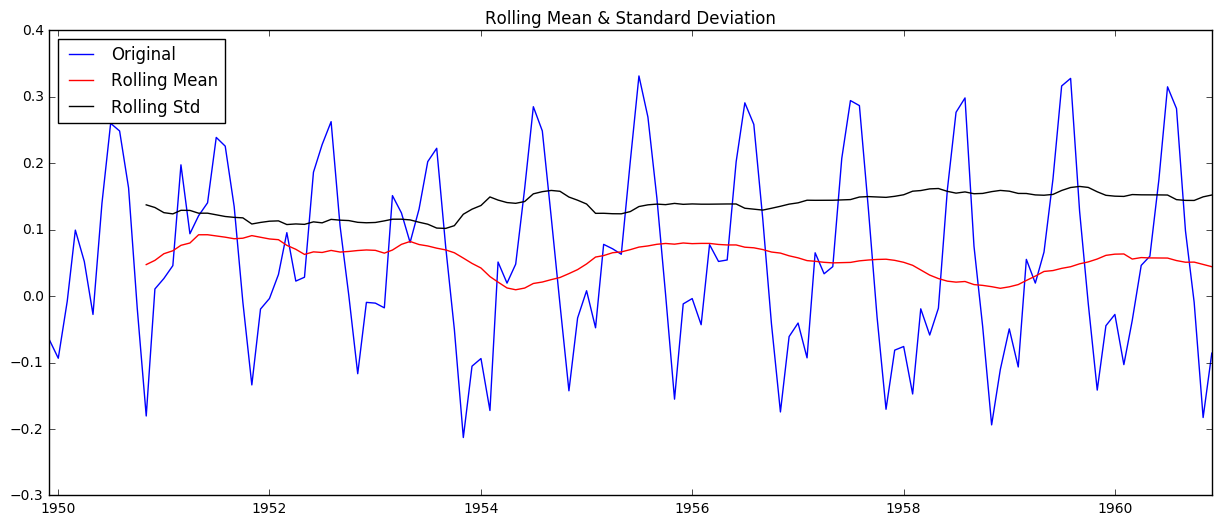

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (5%)             -2.886151
Critical Value (1%)             -3.486535
Critical Value (10%)            -2.579896
dtype: float64


In [28]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


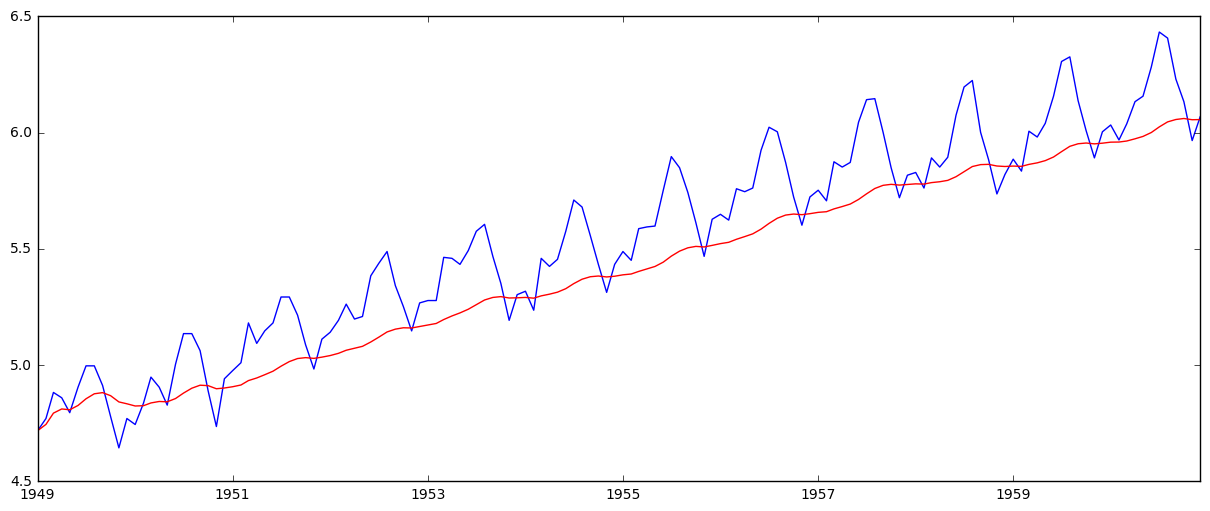

In [29]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


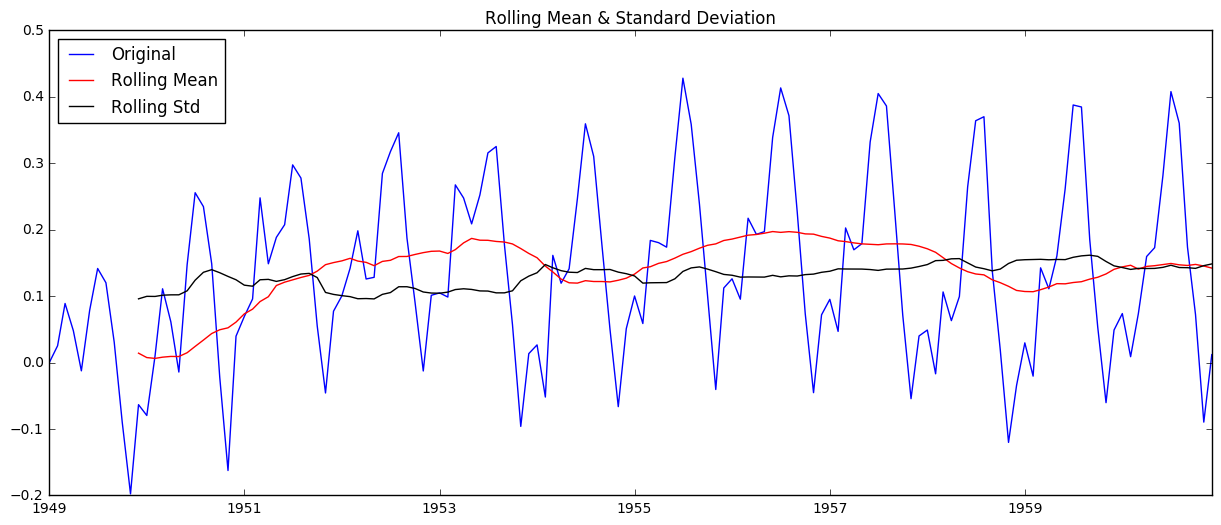

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [30]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

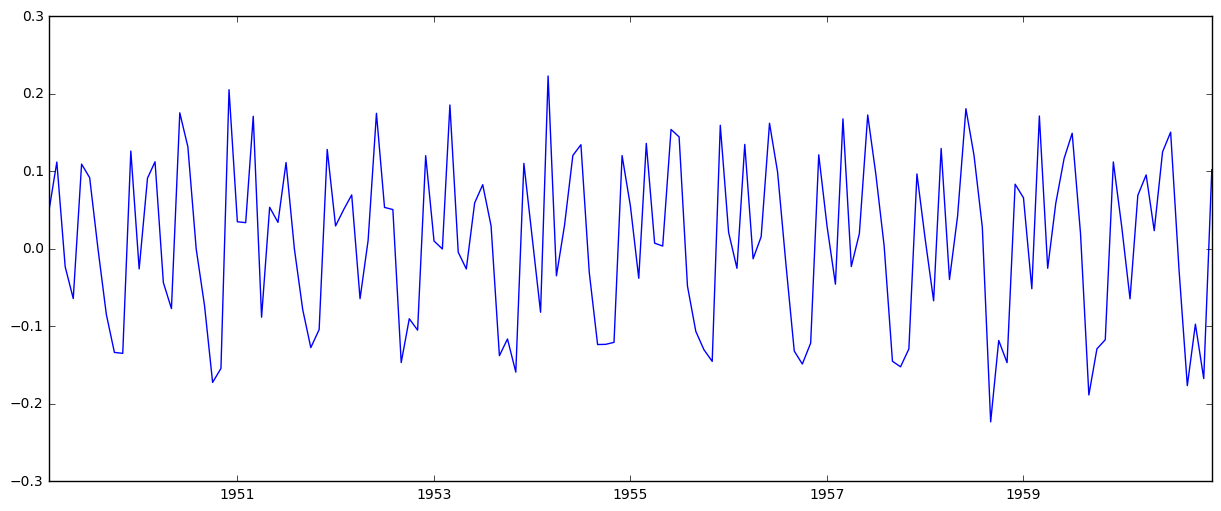

In [31]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


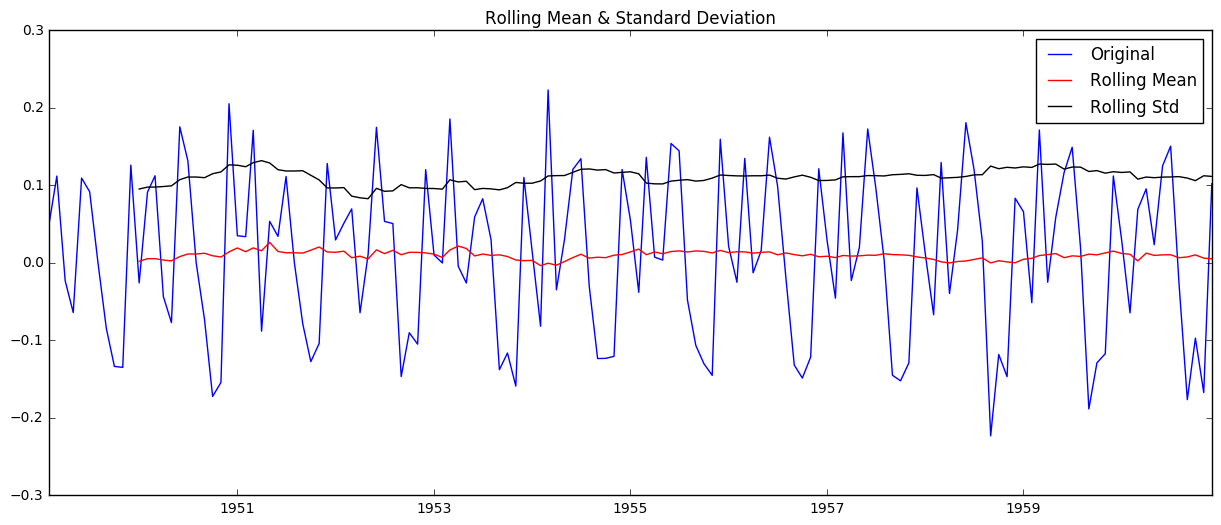

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (5%)             -2.884398
Critical Value (1%)             -3.482501
Critical Value (10%)            -2.578960
dtype: float64


In [32]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

/Users/parksoy/anaconda/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


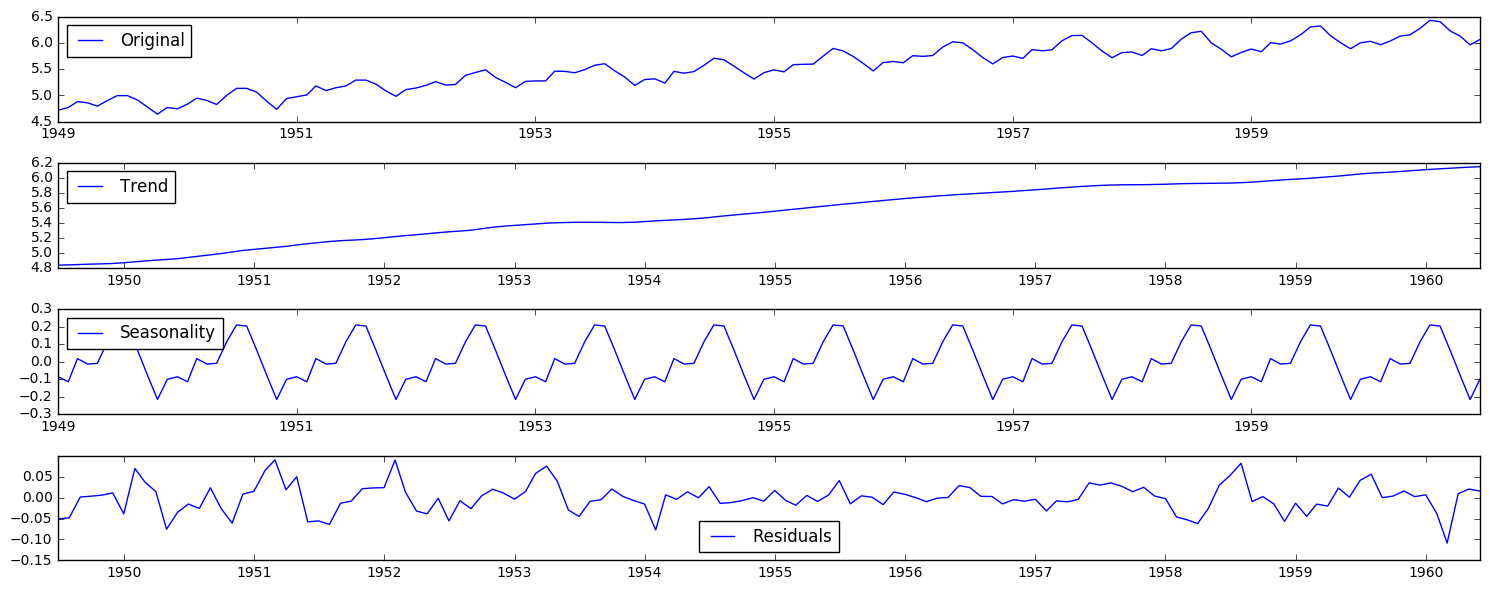

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


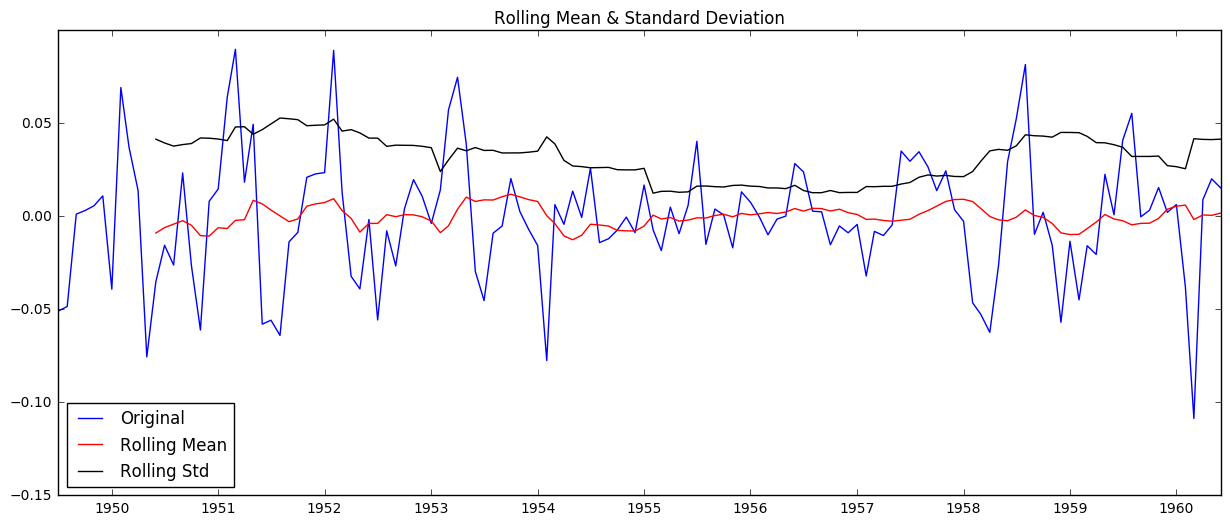

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (5%)           -2.885538e+00
Critical Value (1%)           -3.485122e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [34]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

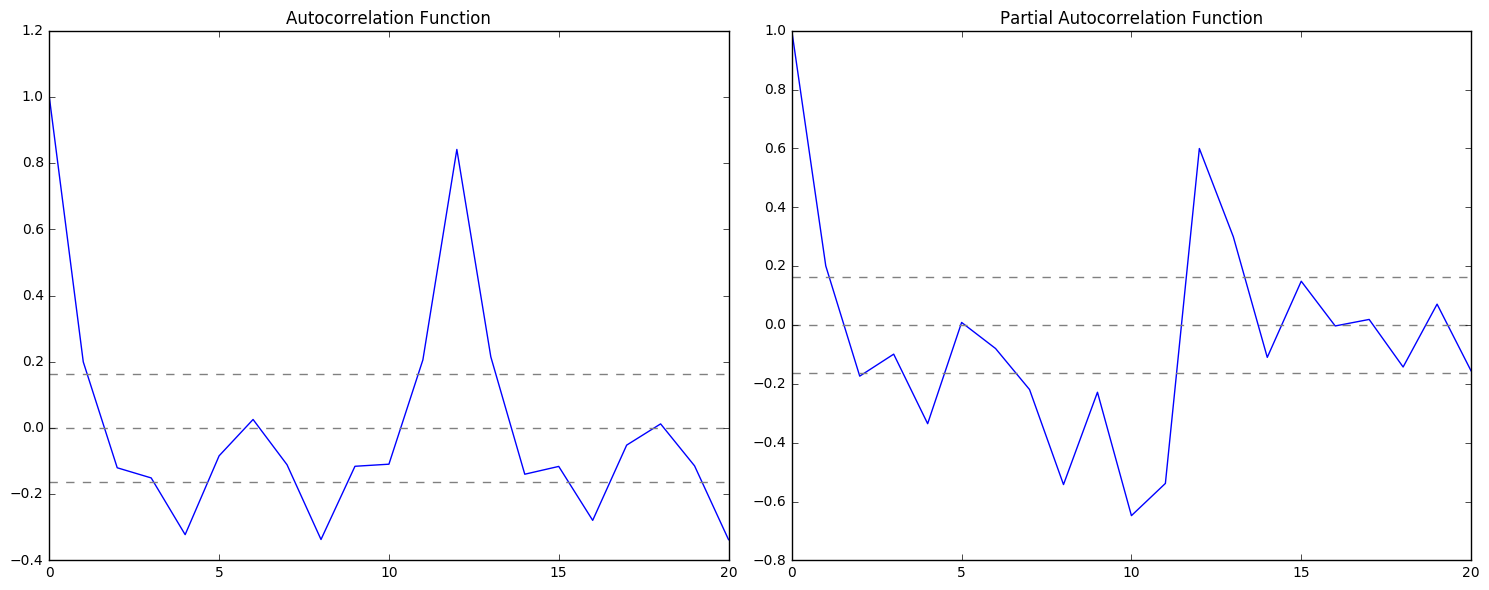

In [36]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

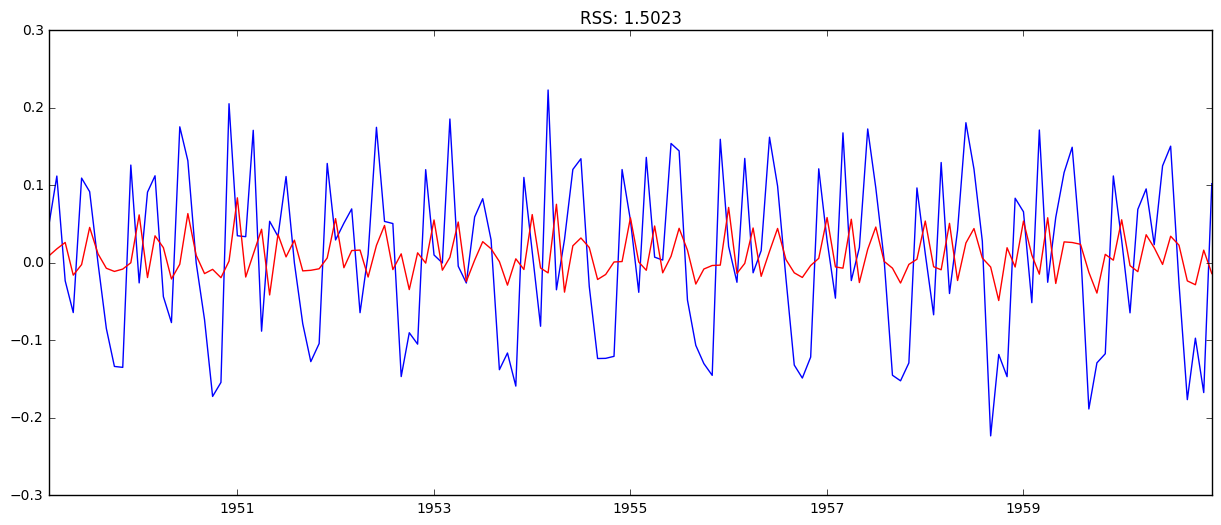

In [37]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


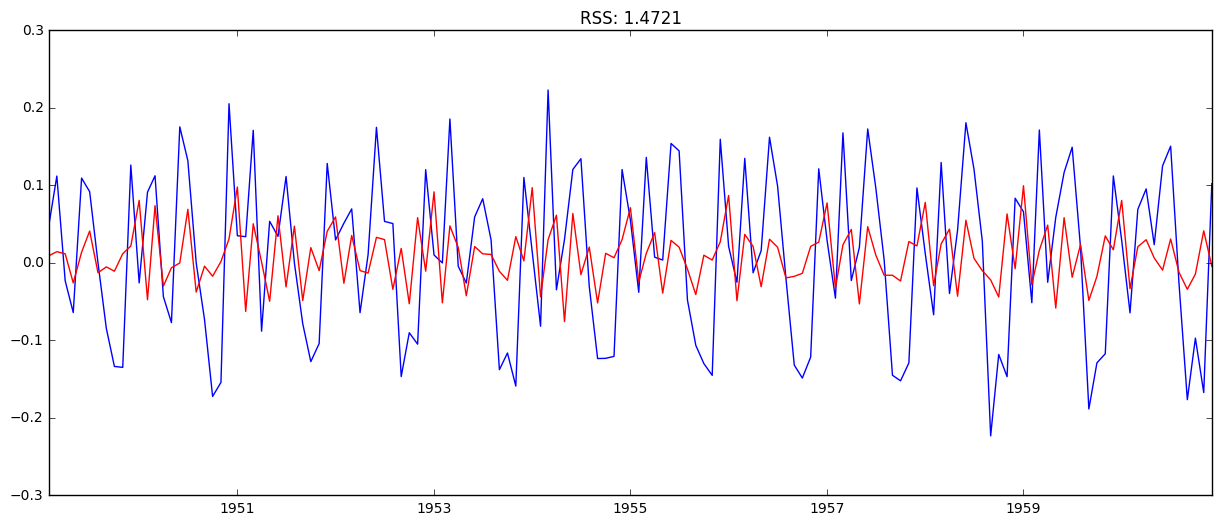

In [38]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

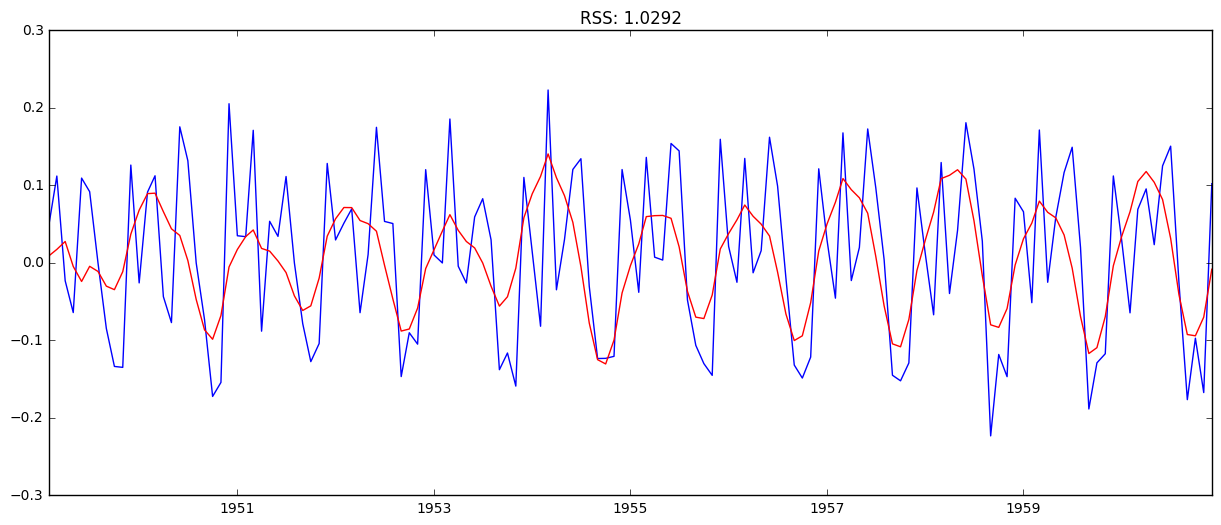

In [39]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [40]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [41]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [42]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

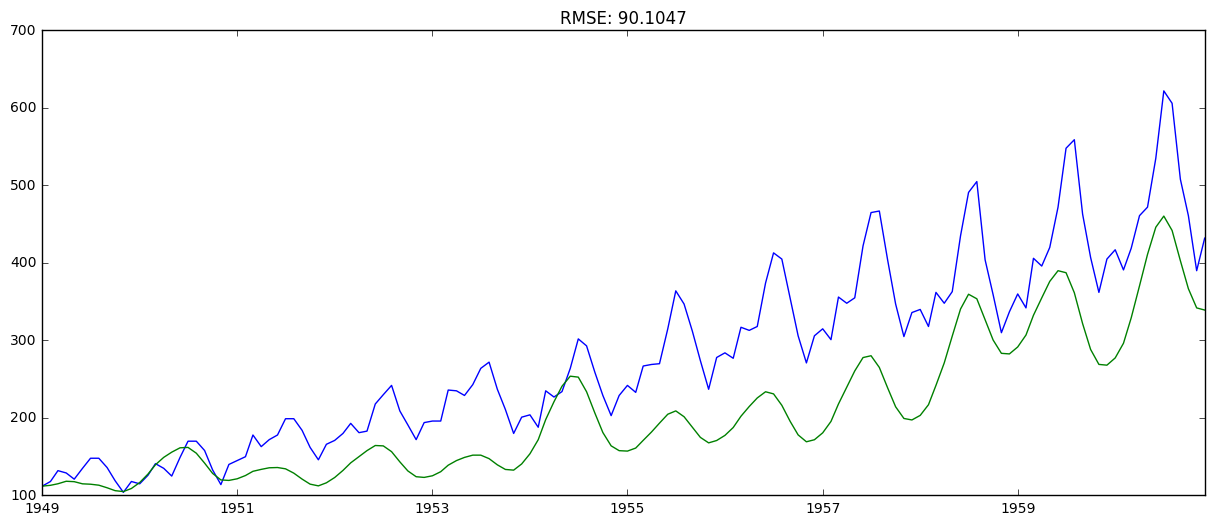

In [43]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

# Time series on stock market analysis 

In [80]:
#http://people.duke.edu/~rnau/411home.htm
#http://www.johnwittenauer.net/a-simple-time-series-analysis-of-the-sp-500-index/
#https://github.com/jdwittenauer/ipython-notebooks

In [50]:
%matplotlib inline
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
import seaborn as sb  
sb.set_style('darkgrid')

path = os.getcwd() + '\SNP.csv'  
stock_data = pd.read_csv('SNP.csv')  
stock_data['Date'] = stock_data['Date'].convert_objects(convert_dates='coerce')  
stock_data = stock_data.sort_index(by='Date')  
stock_data = stock_data.set_index('Date')  

/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


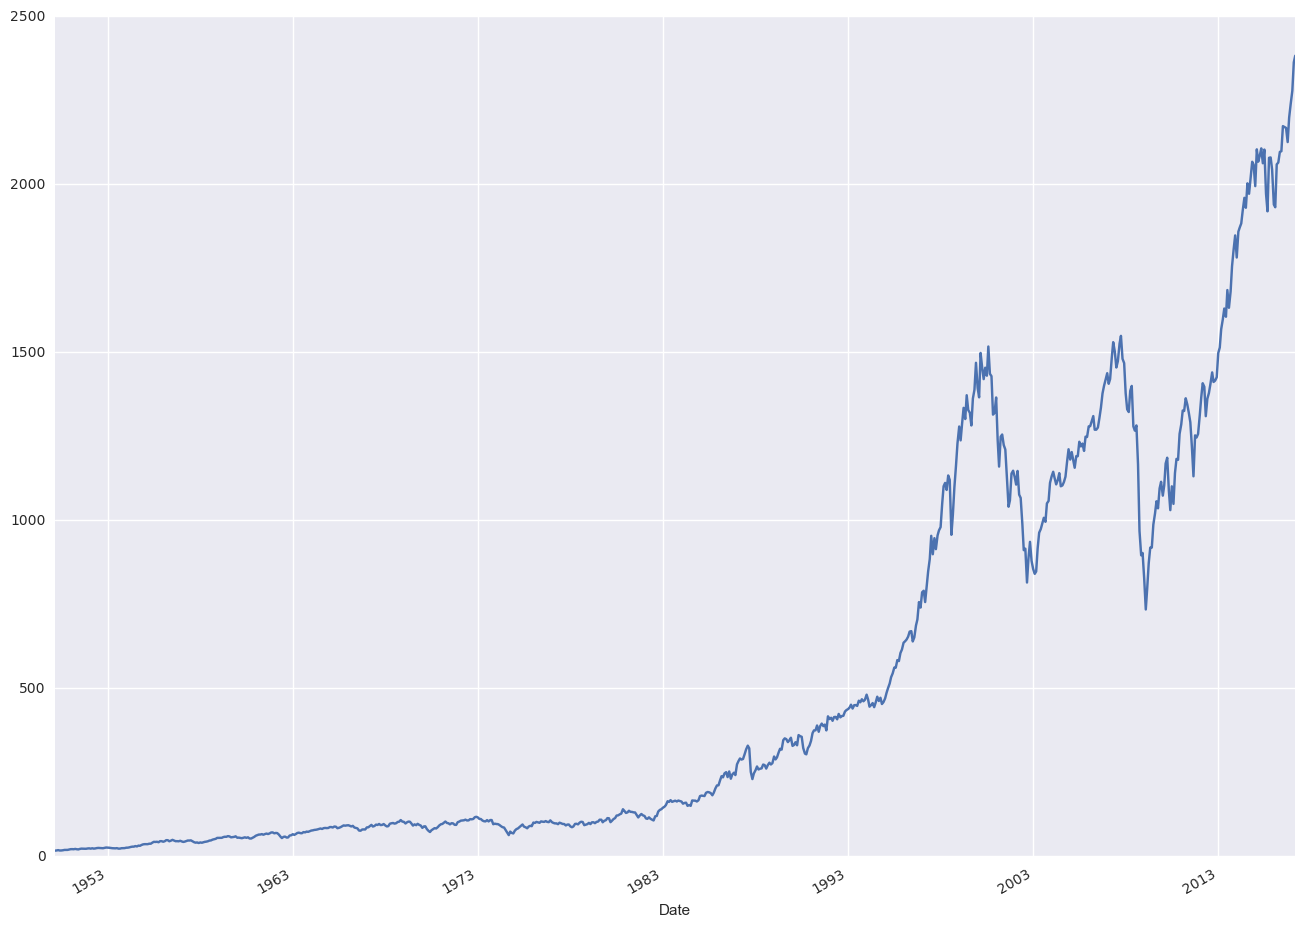

In [51]:
stock_data['Close'].plot(figsize=(16, 12))  

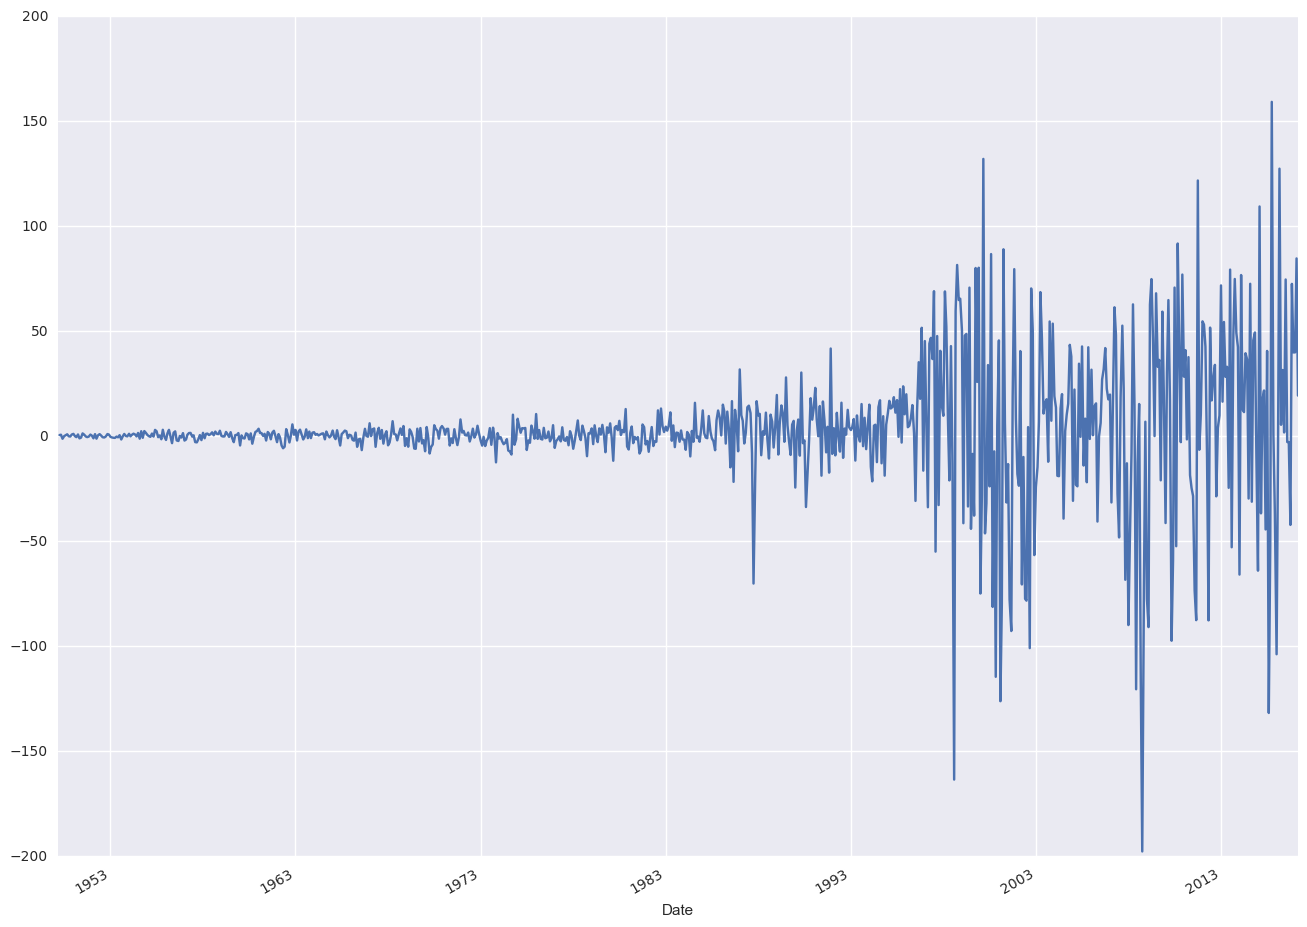

In [52]:
stock_data['First Difference'] = stock_data['Close'] - stock_data['Close'].shift()  
stock_data['First Difference'].plot(figsize=(16, 12))  

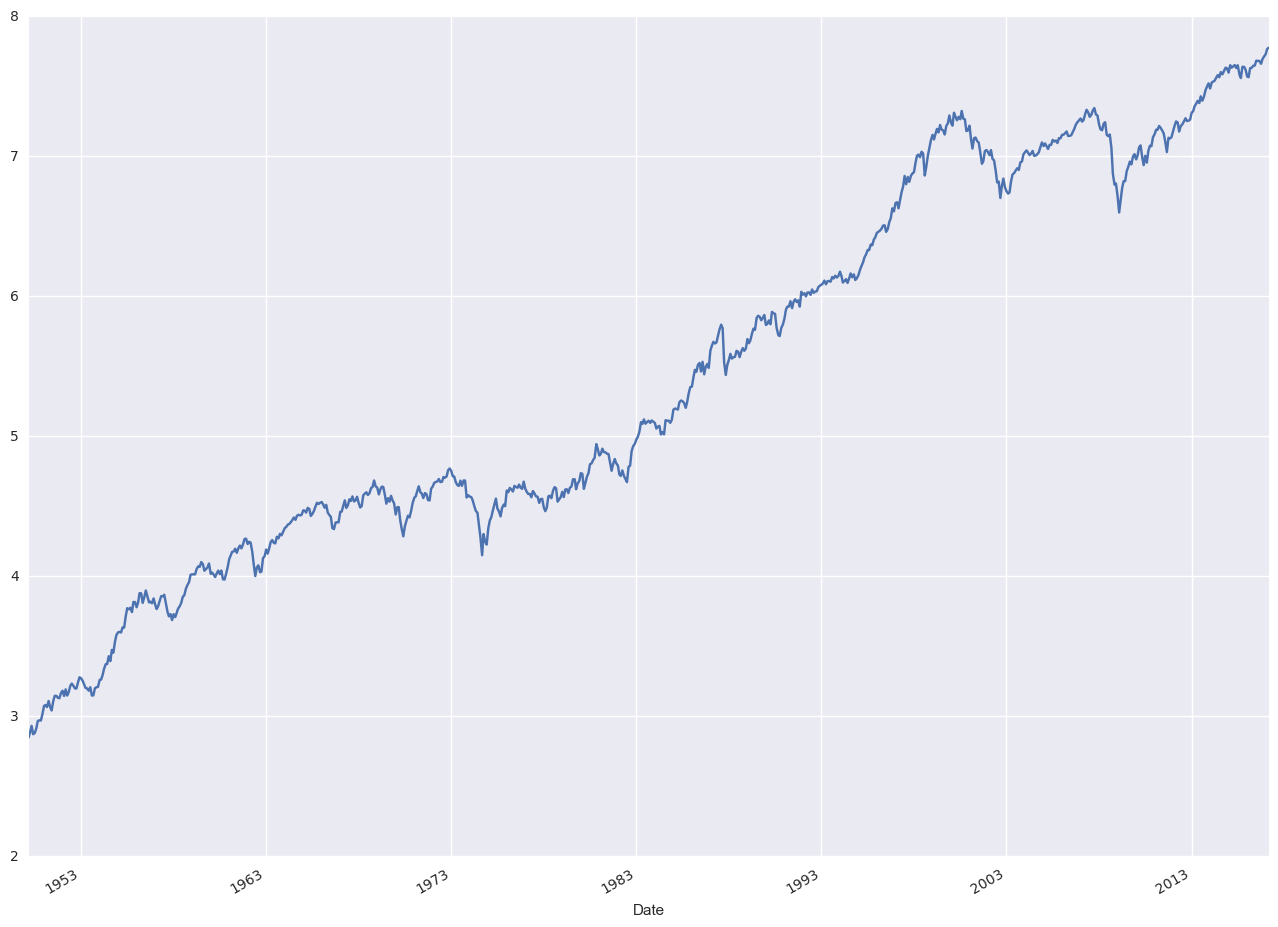

In [53]:
stock_data['Natural Log'] = stock_data['Close'].apply(lambda x: np.log(x))  
stock_data['Natural Log'].plot(figsize=(16, 12))  

/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=True).var()
  if __name__ == '__main__':
/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=True).var()
  from ipykernel import kernelapp as app


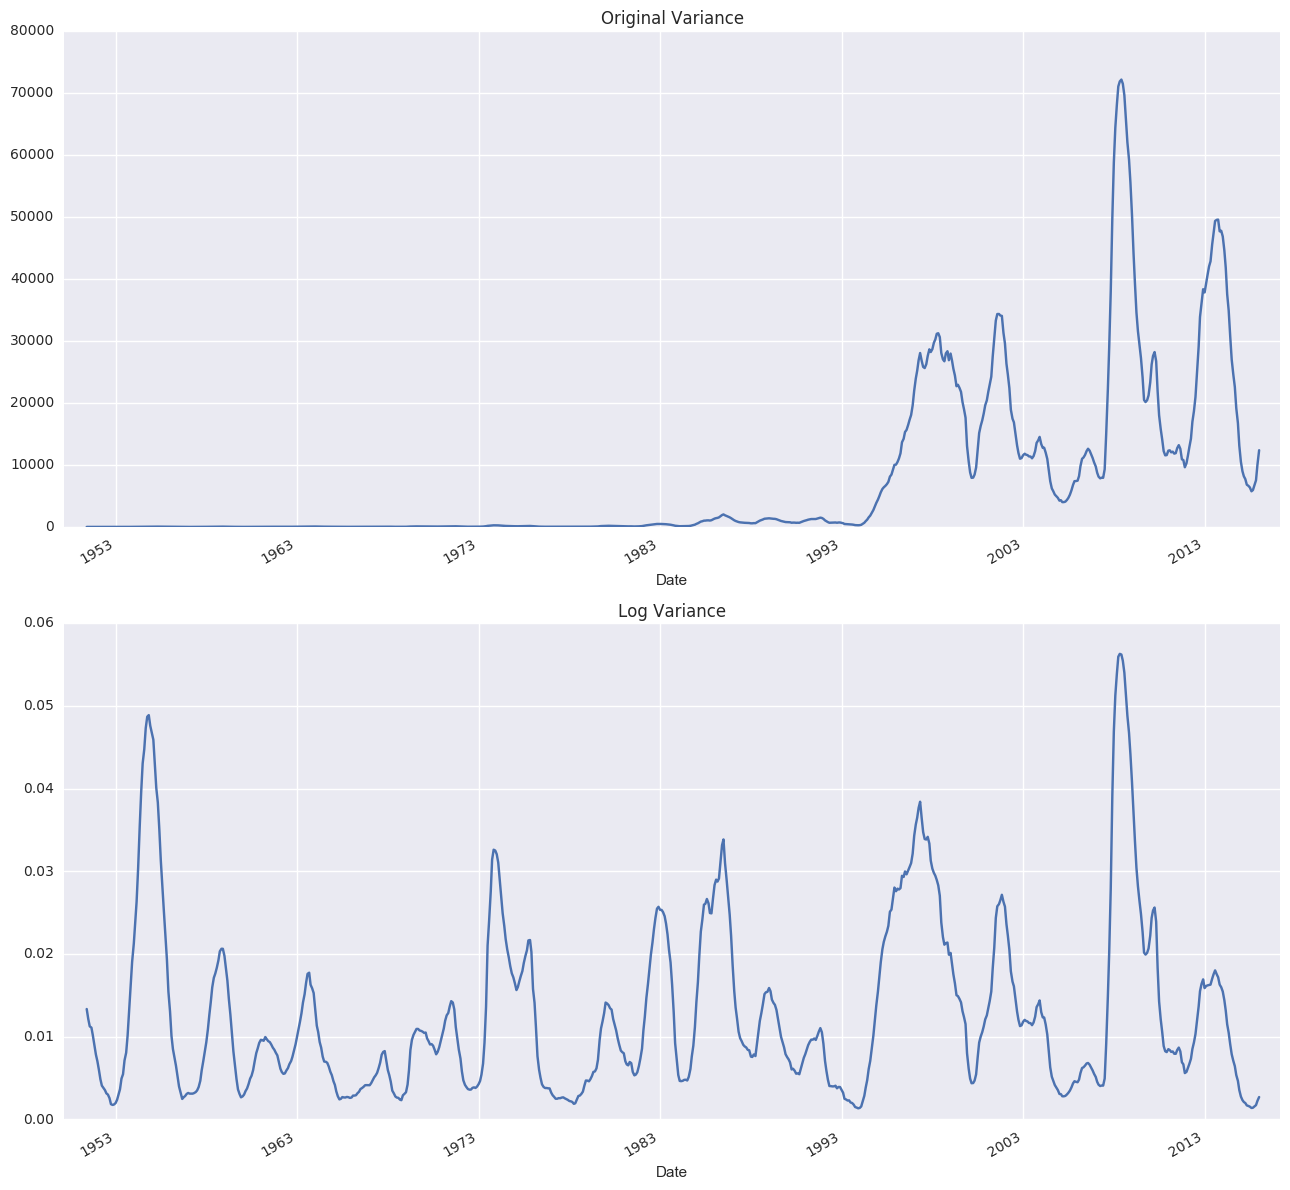

In [54]:
stock_data['Original Variance'] = pd.rolling_var(stock_data['Close'], 30, min_periods=None, freq=None, center=True)  
stock_data['Log Variance'] = pd.rolling_var(stock_data['Natural Log'], 30, min_periods=None, freq=None, center=True)

fig, ax = plt.subplots(2, 1, figsize=(13, 12))  
stock_data['Original Variance'].plot(ax=ax[0], title='Original Variance')  
stock_data['Log Variance'].plot(ax=ax[1], title='Log Variance')  
fig.tight_layout()  

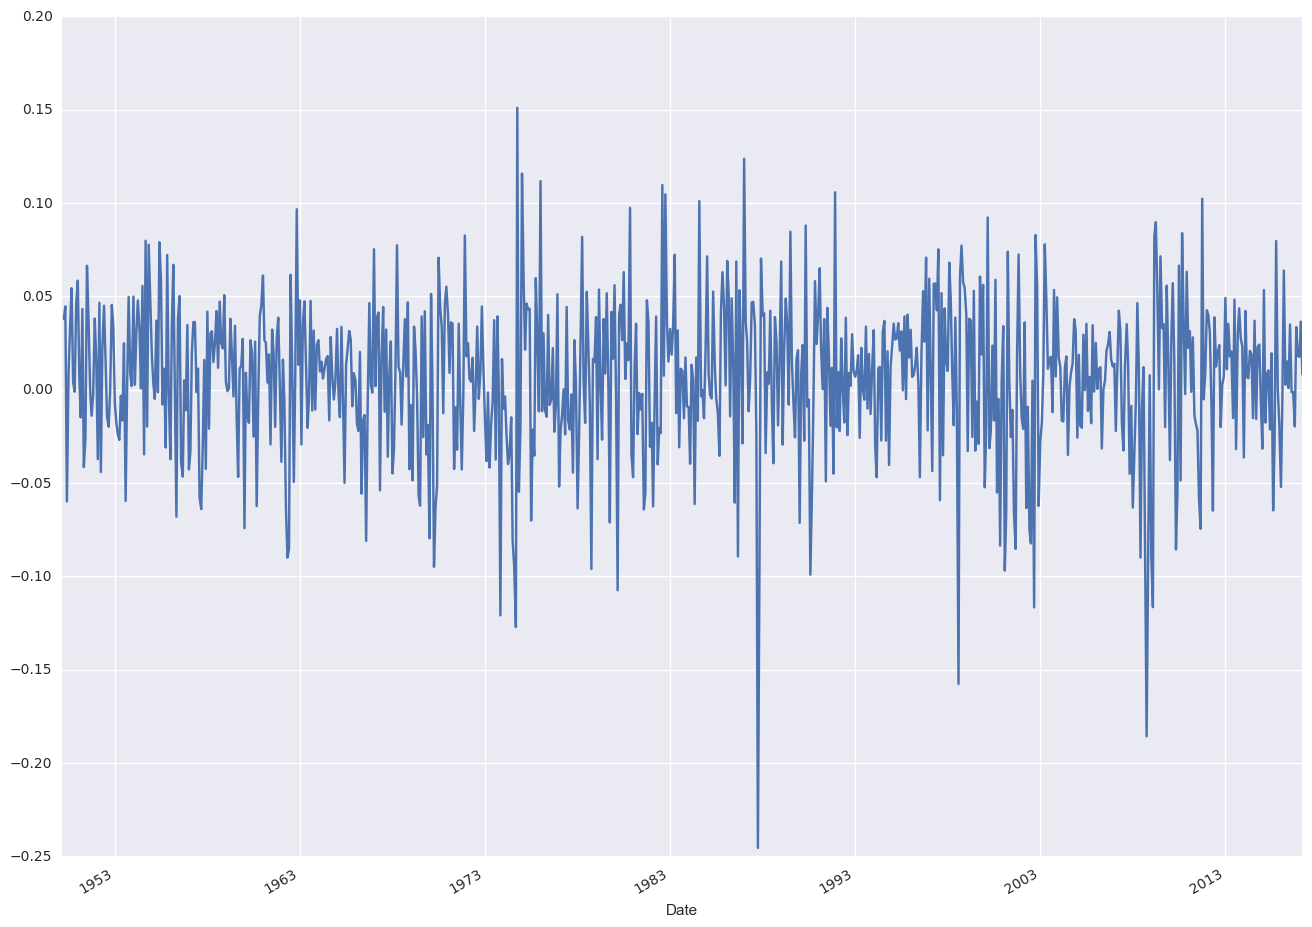

In [55]:
stock_data['Logged First Difference'] = stock_data['Natural Log'] - stock_data['Natural Log'].shift()  
stock_data['Logged First Difference'].plot(figsize=(16, 12))  

In [56]:
stock_data['Lag 1'] = stock_data['Logged First Difference'].shift()  
stock_data['Lag 2'] = stock_data['Logged First Difference'].shift(2)  
stock_data['Lag 5'] = stock_data['Logged First Difference'].shift(5)  
stock_data['Lag 30'] = stock_data['Logged First Difference'].shift(30)  

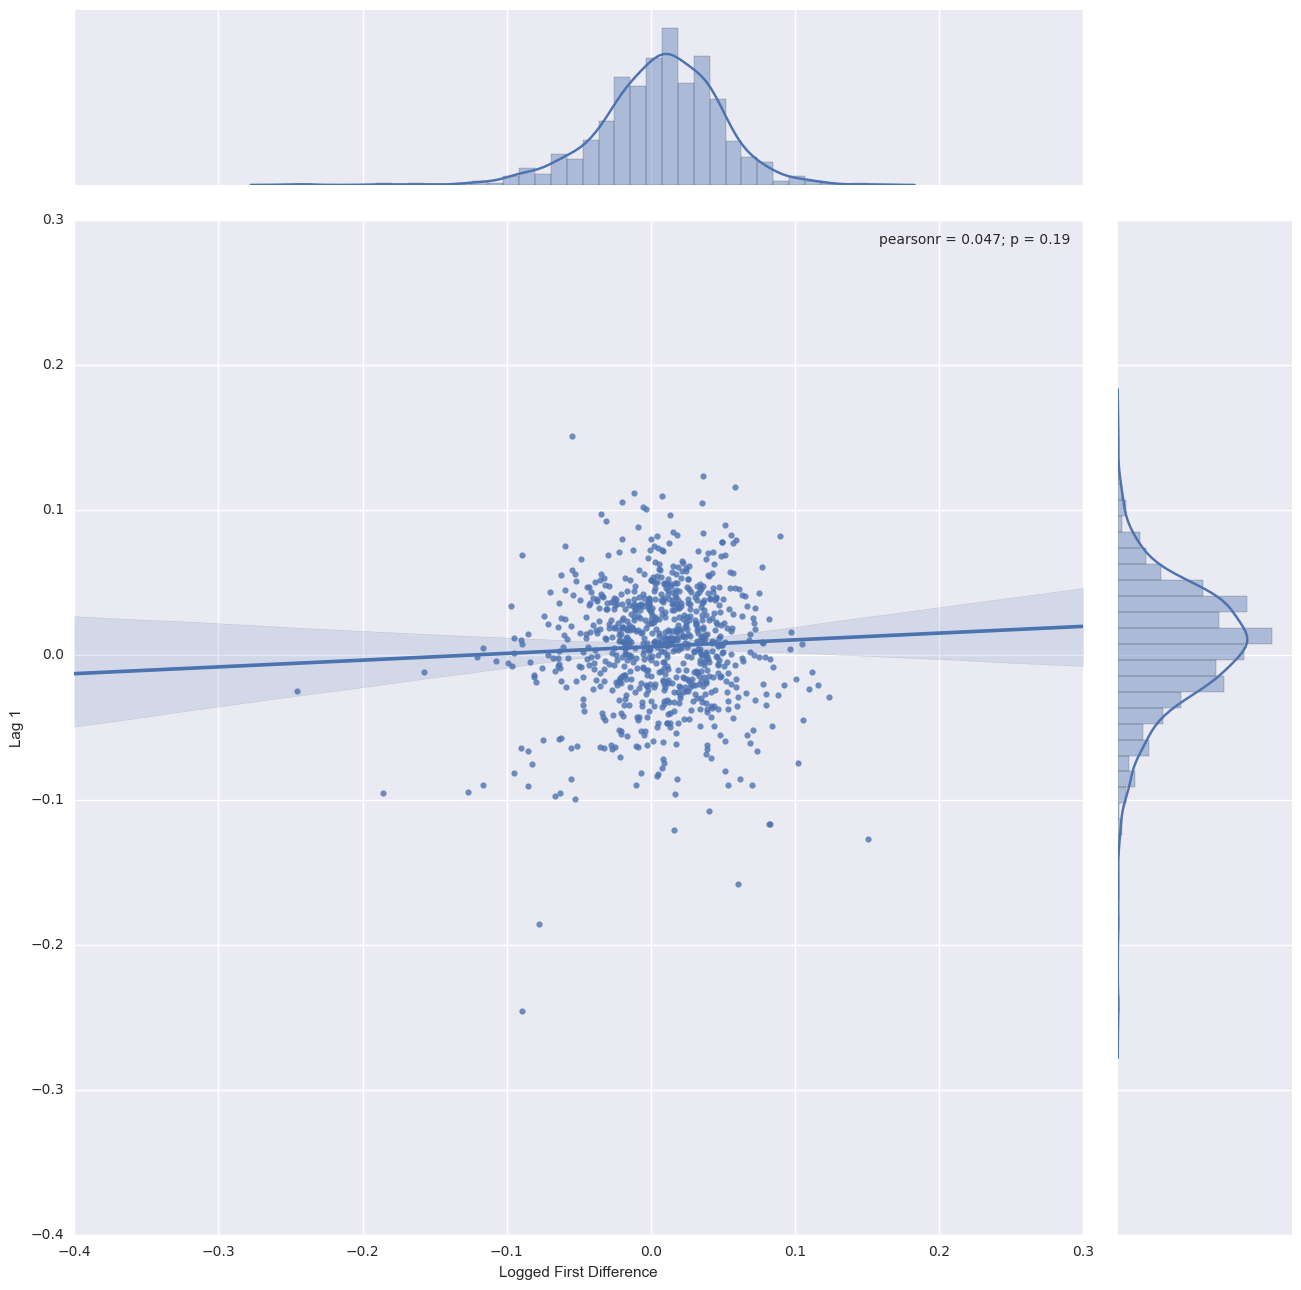

In [57]:
sb.jointplot('Logged First Difference', 'Lag 1', stock_data, kind='reg', size=13)  

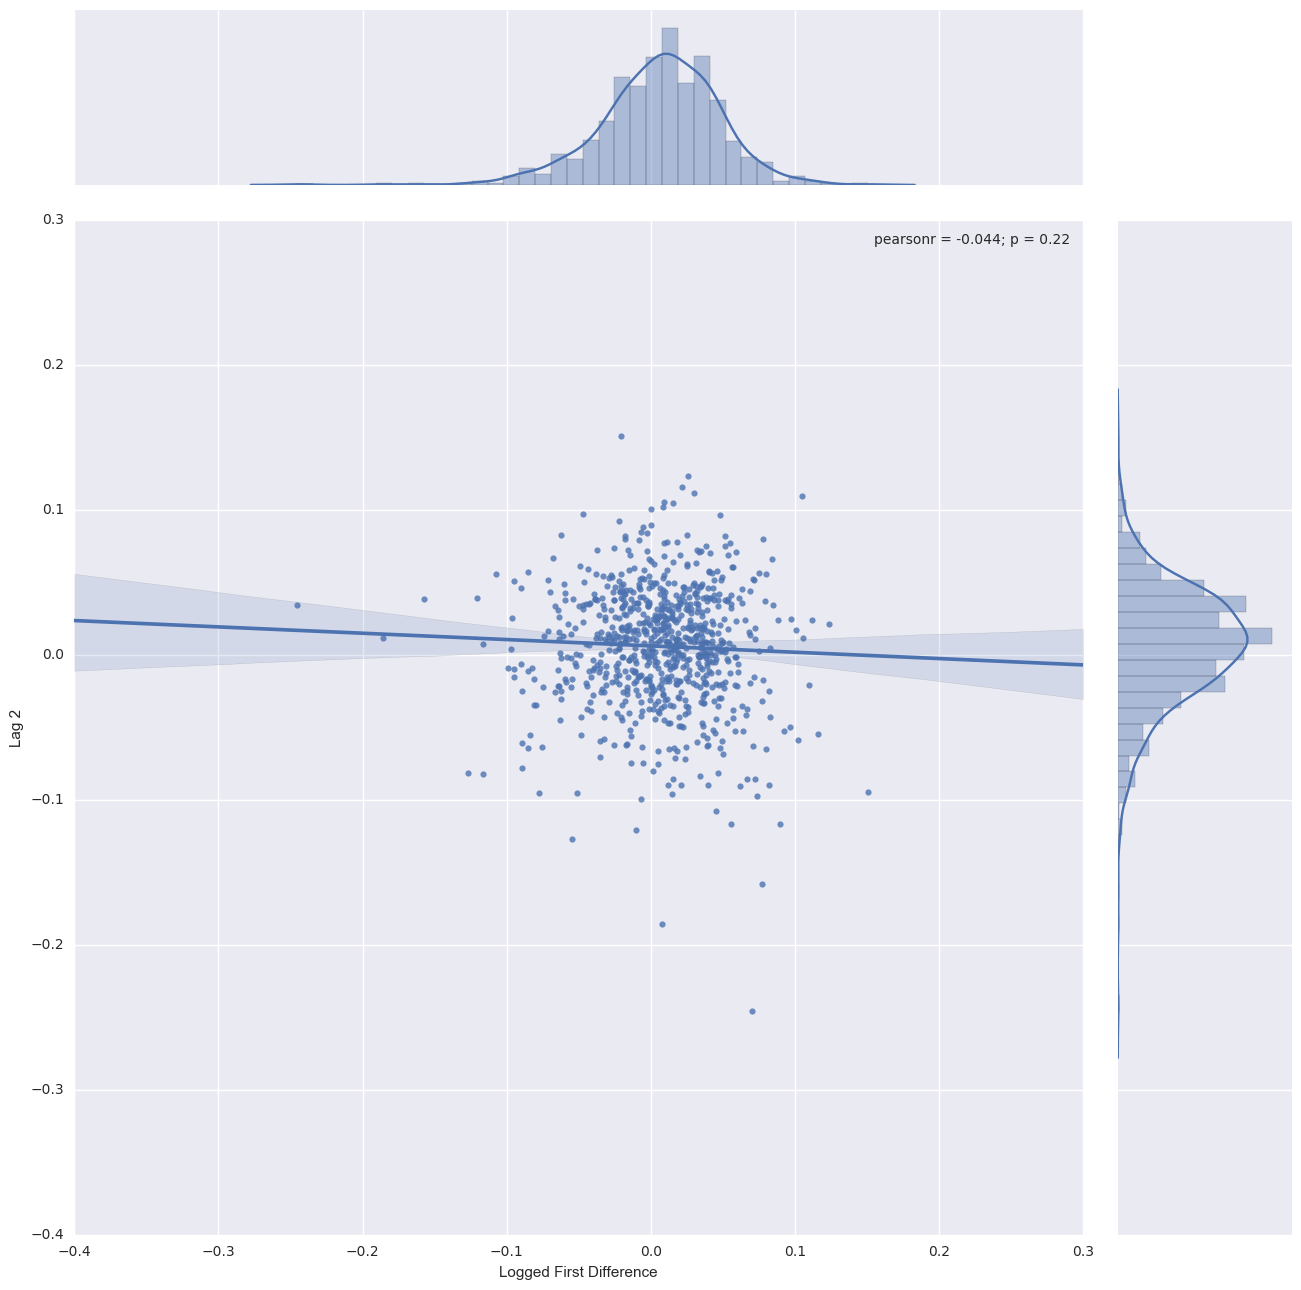

In [58]:
sb.jointplot('Logged First Difference', 'Lag 2', stock_data, kind='reg', size=13)  

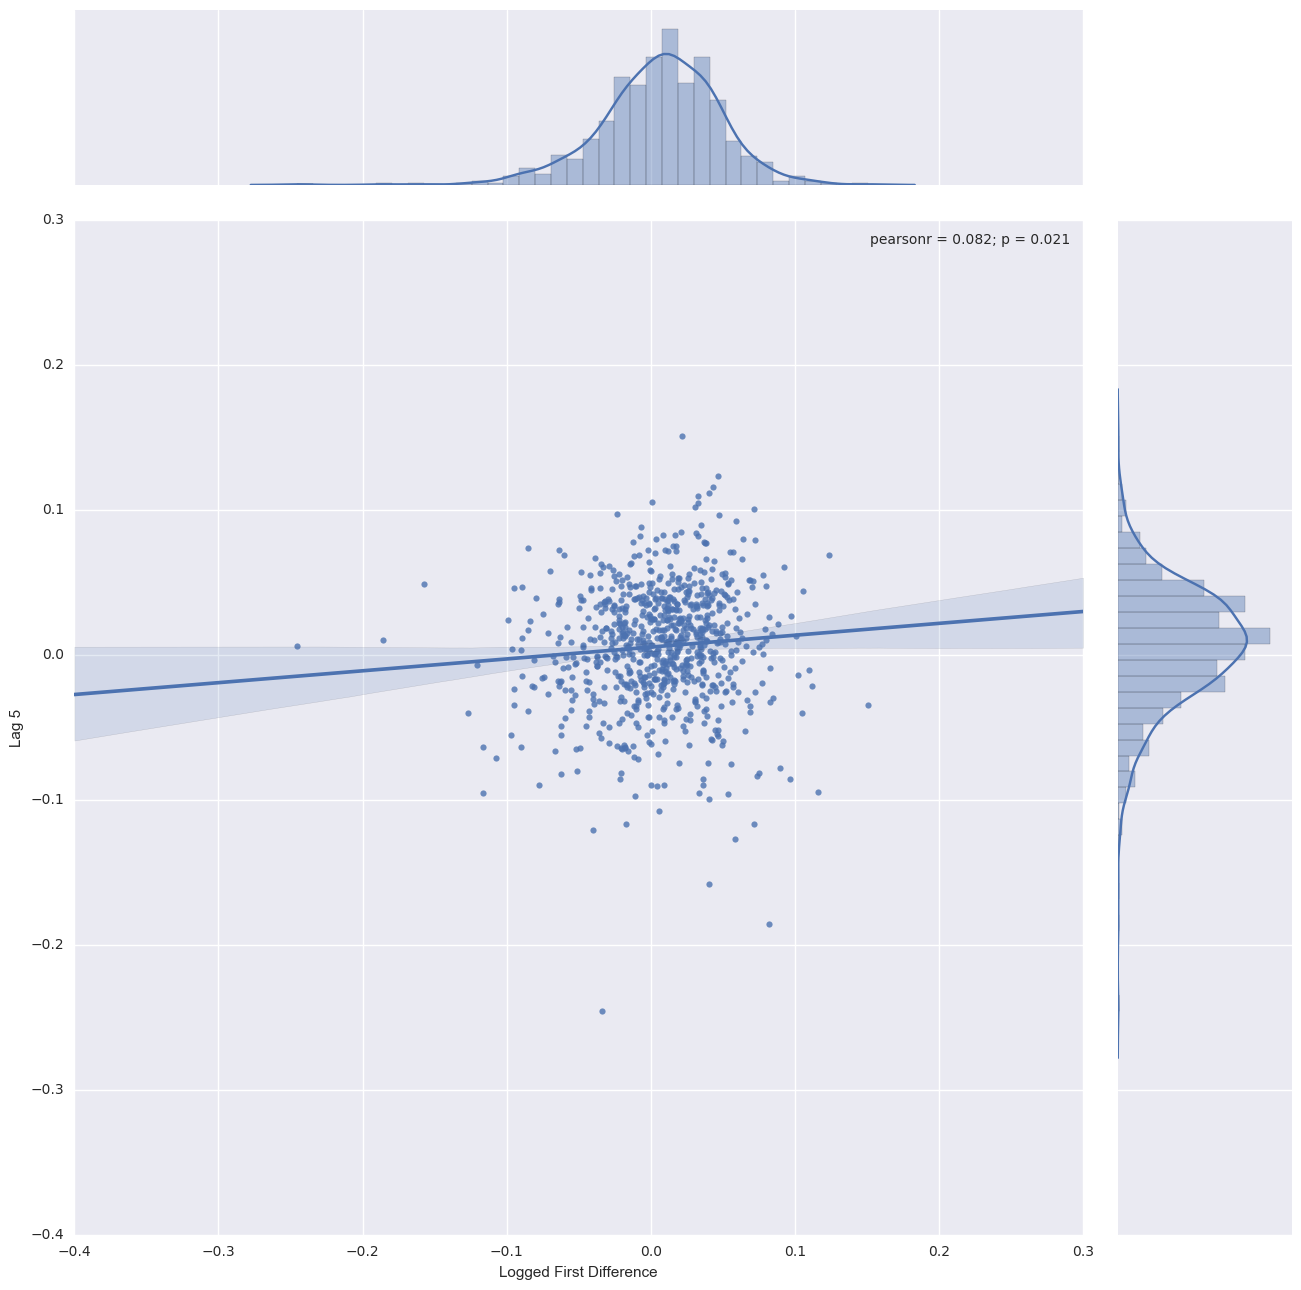

In [59]:
sb.jointplot('Logged First Difference', 'Lag 5', stock_data, kind='reg', size=13)  

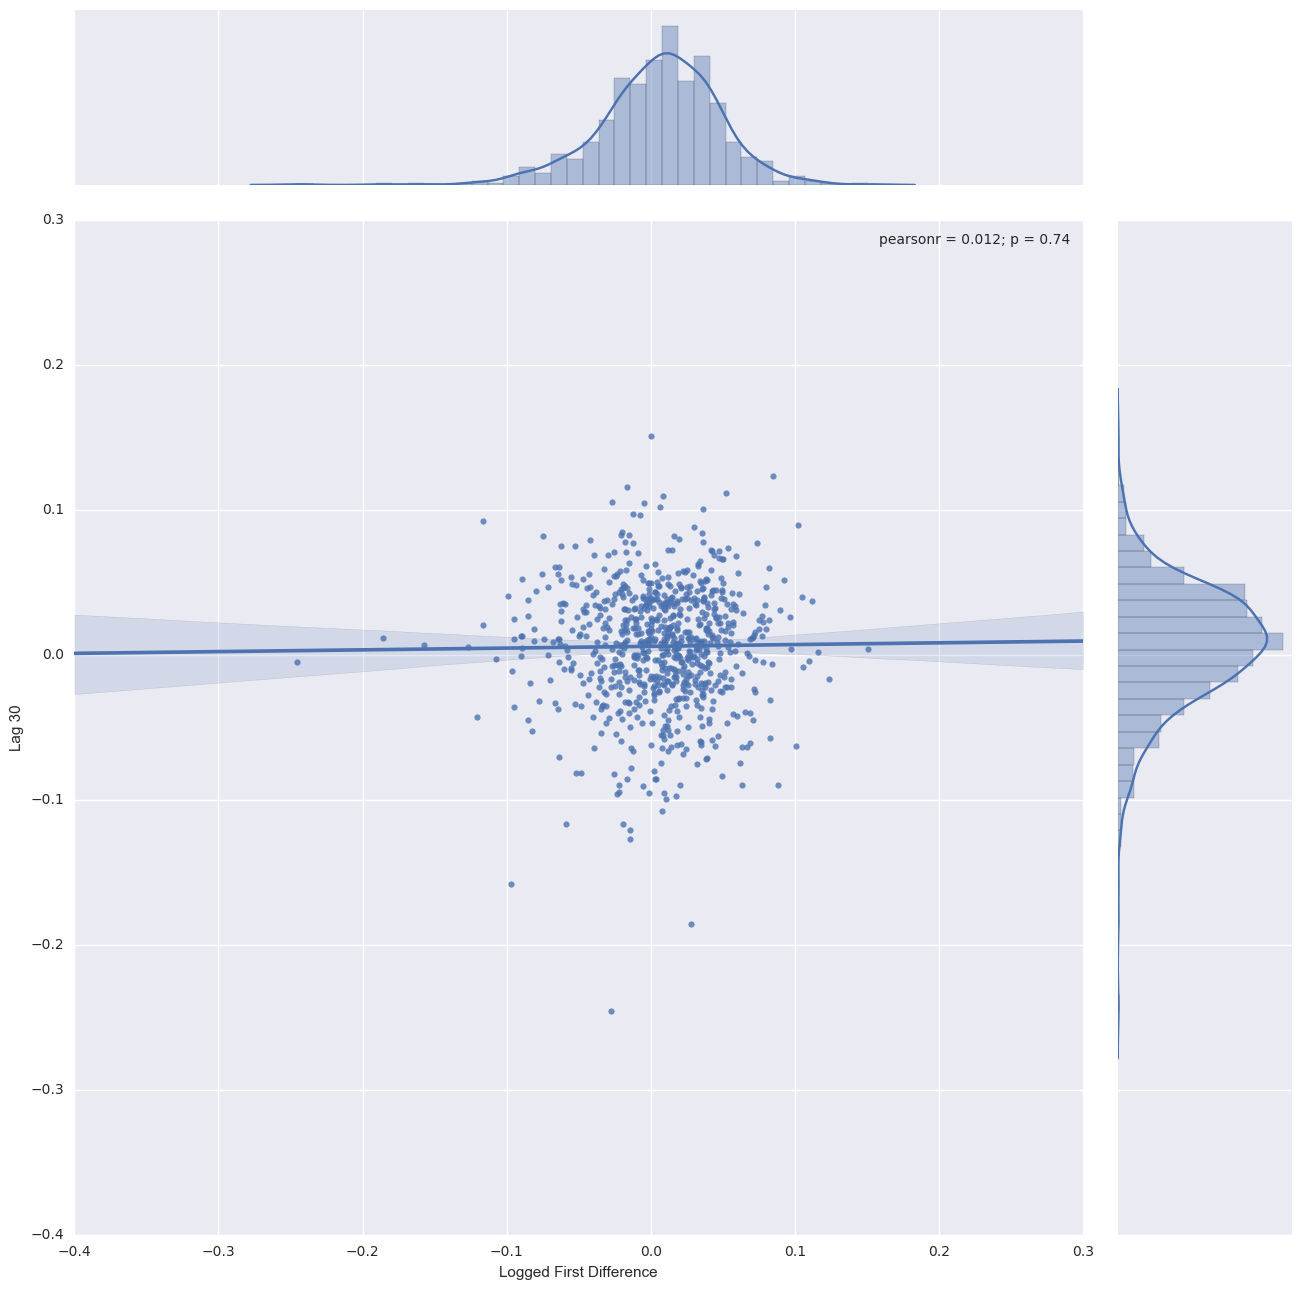

In [60]:
sb.jointplot('Logged First Difference', 'Lag 30', stock_data, kind='reg', size=13)  

In [61]:
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

lag_correlations = acf(stock_data['Logged First Difference'].iloc[1:])  
lag_partial_correlations = pacf(stock_data['Logged First Difference'].iloc[1:])  

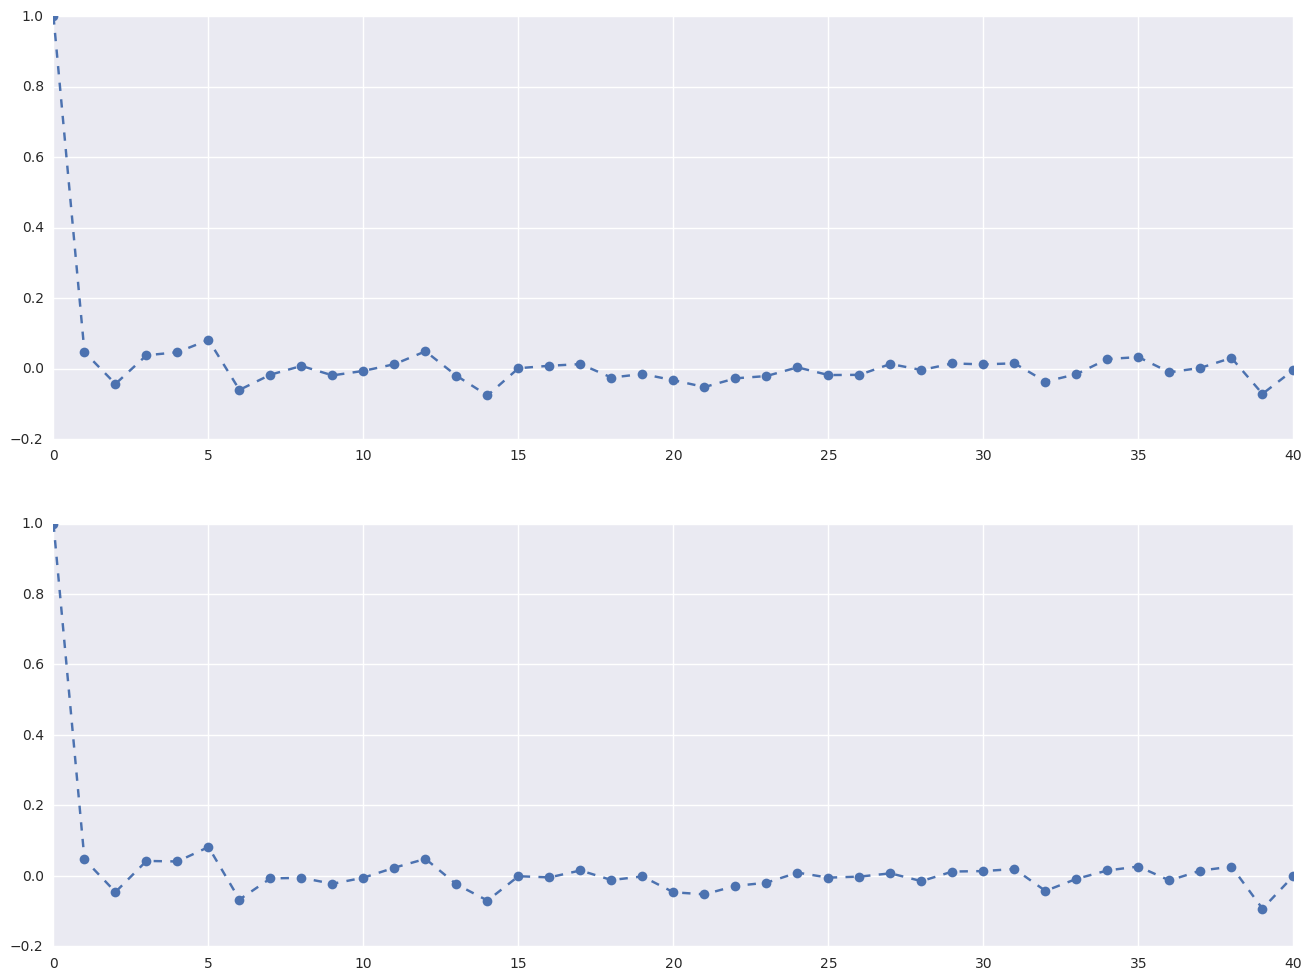

In [71]:
fig, ax= plt.subplots(2,figsize=(16,12))  
ax[0].plot(lag_correlations, marker='o', linestyle='--')
ax[1].plot(lag_partial_correlations, marker='o', linestyle='--')

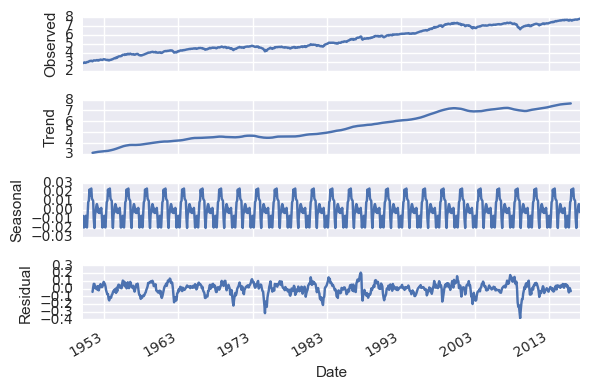

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(stock_data['Natural Log'], model='additive', freq=30)  
fig = plt.figure()  
fig = decomposition.plot()  

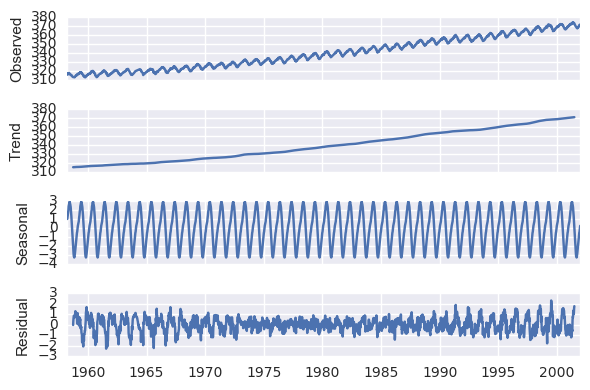

In [73]:
co2_data = sm.datasets.co2.load_pandas().data  
co2_data.co2.interpolate(inplace=True)  
result = sm.tsa.seasonal_decompose(co2_data.co2)  
fig = plt.figure()  
fig = result.plot()  

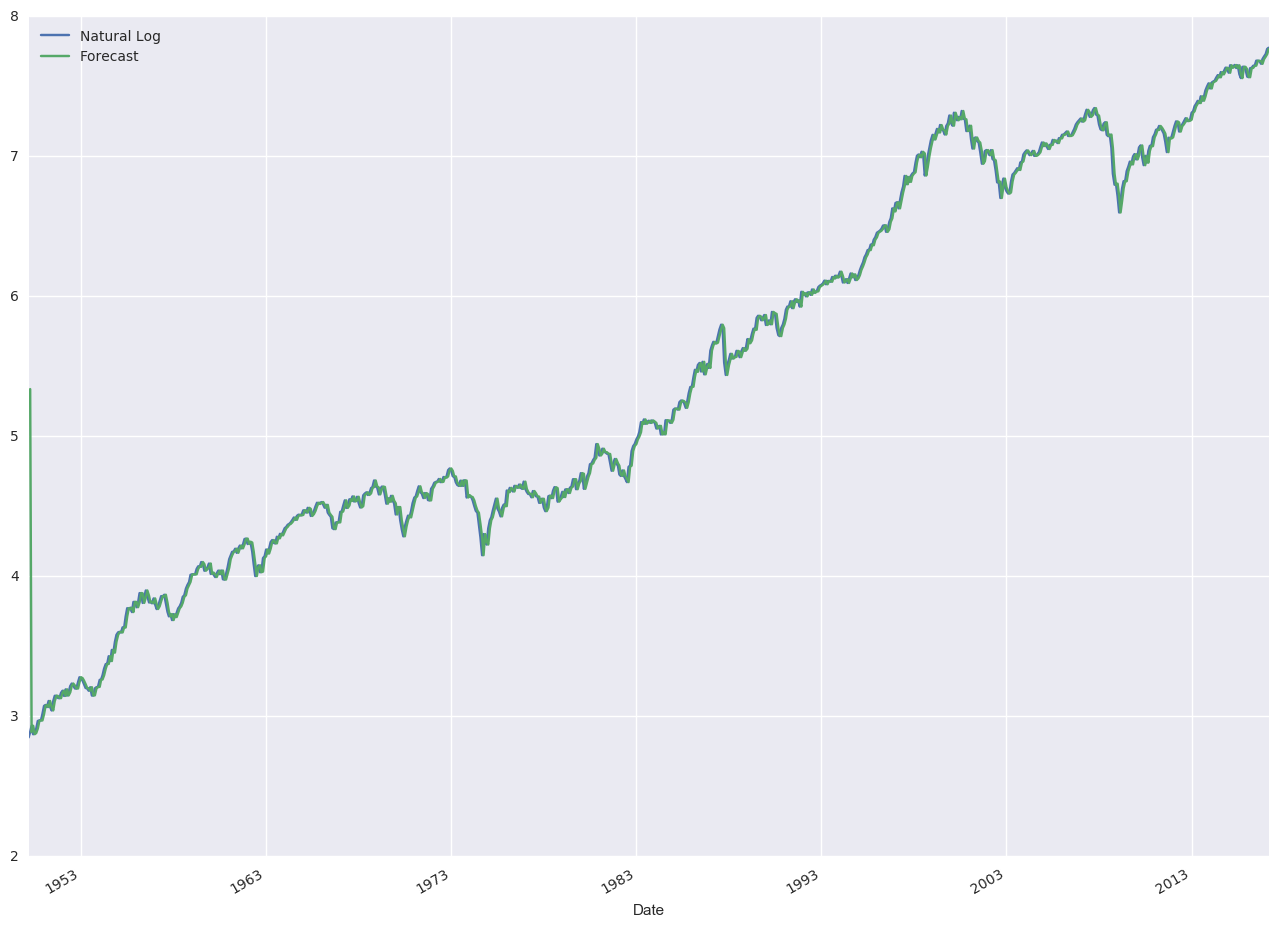

In [74]:
model = sm.tsa.ARIMA(stock_data['Natural Log'].iloc[1:], order=(1, 0, 0))  
results = model.fit(disp=-1)  
stock_data['Forecast'] = results.fittedvalues  
stock_data[['Natural Log', 'Forecast']].plot(figsize=(16, 12))  

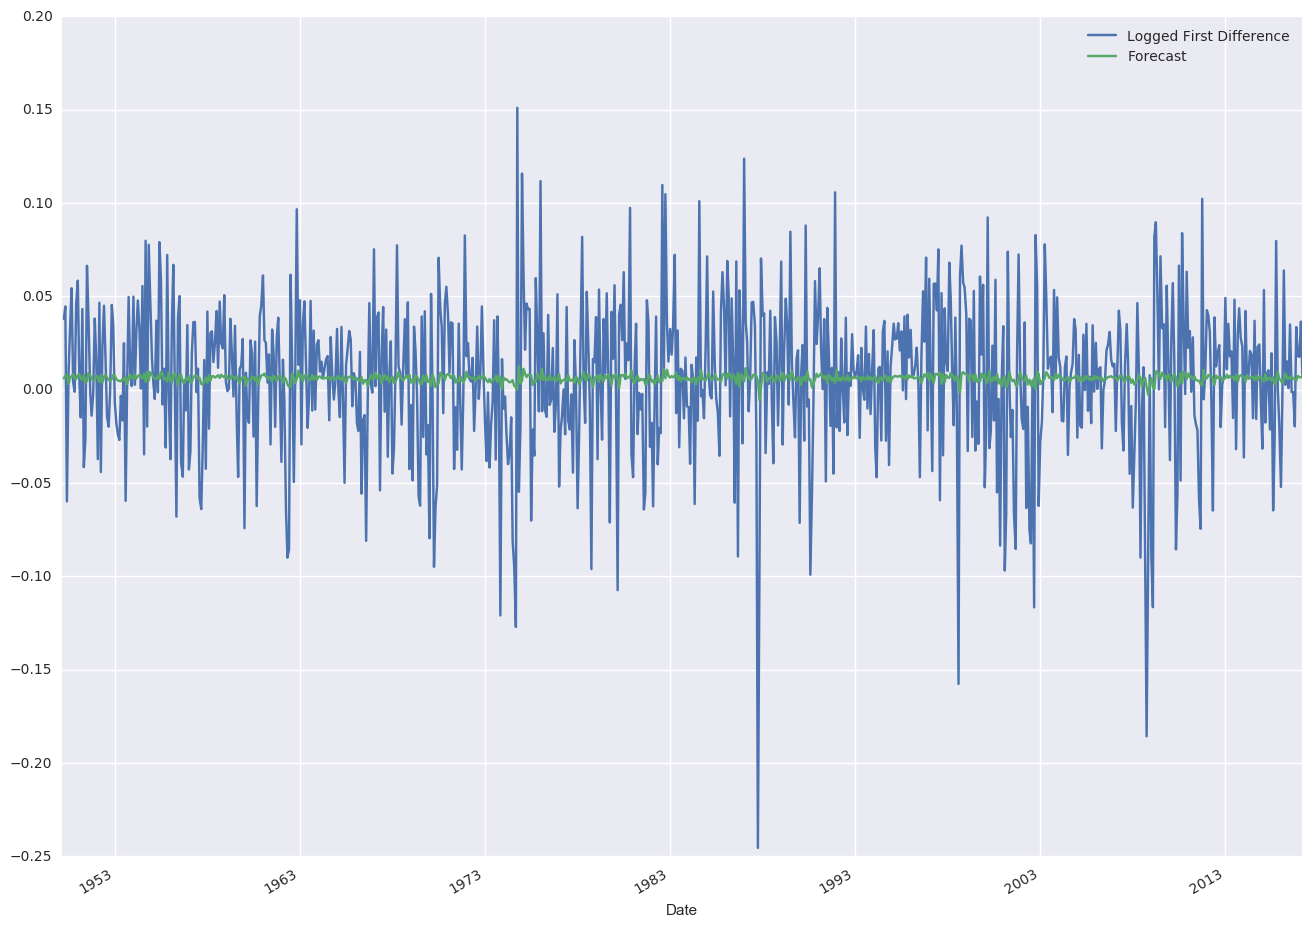

In [75]:
model = sm.tsa.ARIMA(stock_data['Logged First Difference'].iloc[1:], order=(1, 0, 0))  
results = model.fit(disp=-1)  
stock_data['Forecast'] = results.fittedvalues  
stock_data[['Logged First Difference', 'Forecast']].plot(figsize=(16, 12))  

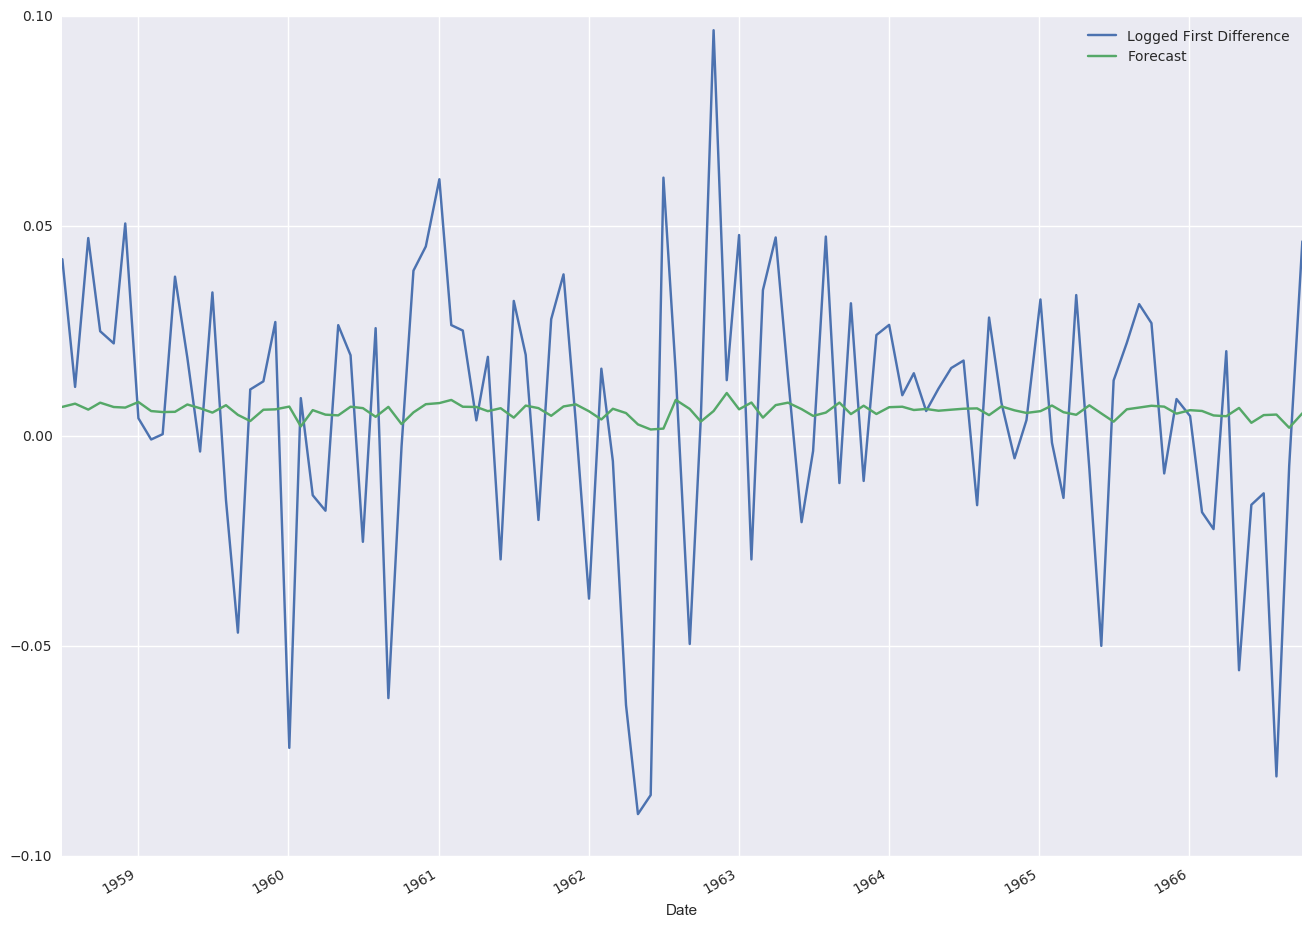

In [78]:
stock_data[['Logged First Difference', 'Forecast']].iloc[100:200, :].plot(figsize=(16, 12))  

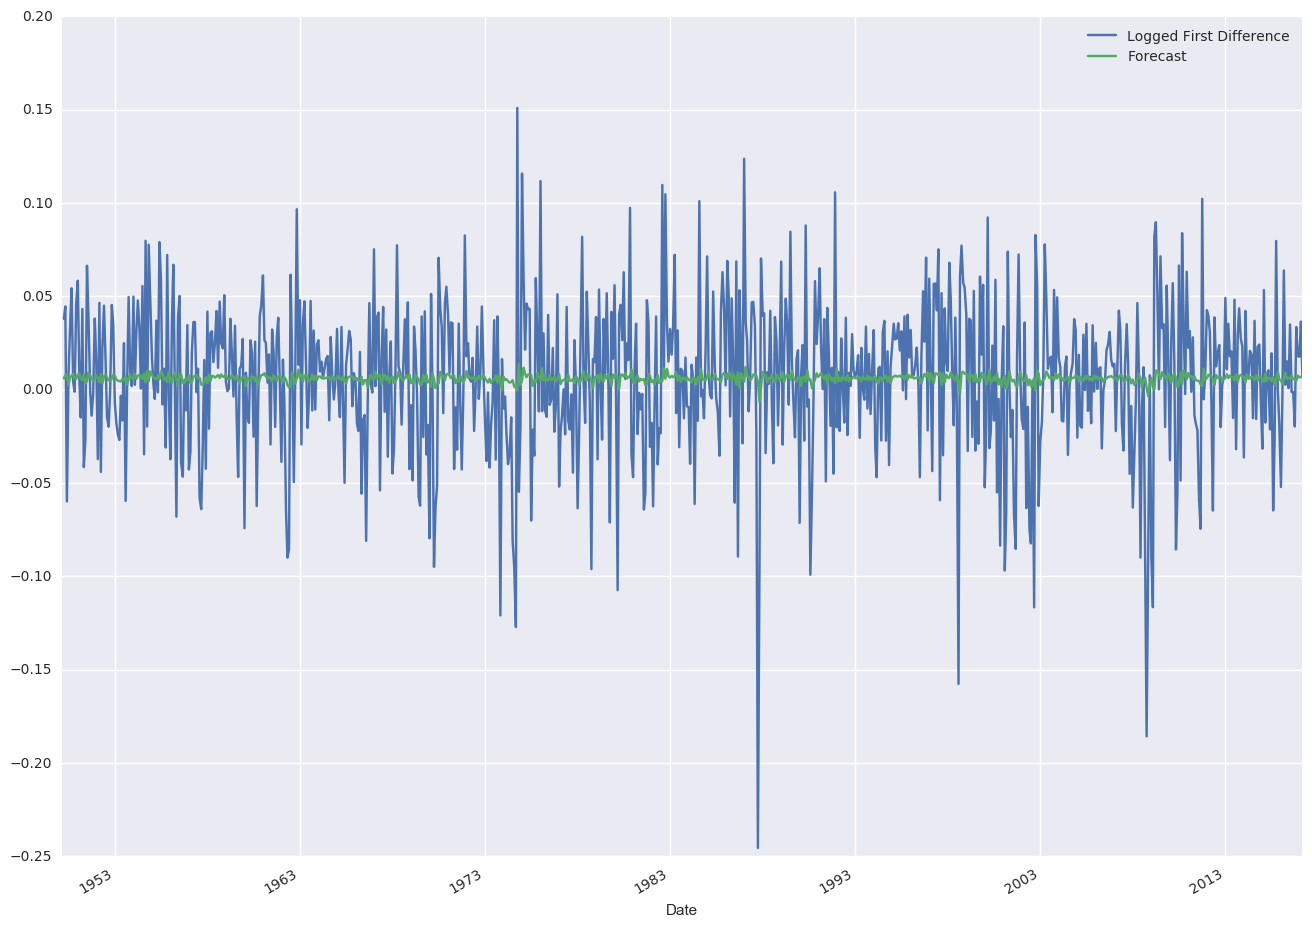

In [79]:
model = sm.tsa.ARIMA(stock_data['Logged First Difference'].iloc[1:], order=(0, 0, 1))  
results = model.fit(disp=-1)  
stock_data['Forecast'] = results.fittedvalues  
stock_data[['Logged First Difference', 'Forecast']].plot(figsize=(16, 12))  